In [1]:
import numpy as npn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from math import sqrt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix,r2_score,accuracy_score,plot_confusion_matrix,f1_score
import matplotlib
from sklearn import svm
from sklearn import metrics

In [2]:
df= pd.read_csv('Proc_Data/crop_data.csv')
df

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Americas +,41,Yield,2007.0,Hg/Ha,10921.0,A,agave_fibres_nes
1,Americas +,41,Yield,2006.0,Hg/Ha,10921.0,A,agave_fibres_nes
2,Americas +,41,Yield,2005.0,Hg/Ha,10921.0,A,agave_fibres_nes
3,Americas +,41,Yield,2004.0,Hg/Ha,11188.0,A,agave_fibres_nes
4,Americas +,41,Yield,2003.0,Hg/Ha,10842.0,A,agave_fibres_nes
...,...,...,...,...,...,...,...,...
631073,World +,41,Yield,1965.0,Hg/Ha,51952.0,A,yautia_cocoyam
631074,World +,41,Yield,1964.0,Hg/Ha,51386.0,A,yautia_cocoyam
631075,World +,41,Yield,1963.0,Hg/Ha,51050.0,A,yautia_cocoyam
631076,World +,41,Yield,1962.0,Hg/Ha,51878.0,A,yautia_cocoyam


In [3]:
df.drop(columns=['element_code','element','unit','value_footnotes'],inplace=True)
df.rename(columns = {'value':'Yield(Hg/Ha)'}, inplace = True) 
df.rename(columns = {'country_or_area':'Country'}, inplace = True) 
df.rename(columns = {'year':'Year'}, inplace = True) 
df

,Country,Year,Yield(Hg/Ha),category
0,Americas +,2007.0,10921.0,agave_fibres_nes
1,Americas +,2006.0,10921.0,agave_fibres_nes
2,Americas +,2005.0,10921.0,agave_fibres_nes
3,Americas +,2004.0,11188.0,agave_fibres_nes
4,Americas +,2003.0,10842.0,agave_fibres_nes
...,...,...,...,...
631073,World +,1965.0,51952.0,yautia_cocoyam
631074,World +,1964.0,51386.0,yautia_cocoyam
631075,World +,1963.0,51050.0,yautia_cocoyam
631076,World +,1962.0,51878.0,yautia_cocoyam


In [4]:
df1=pd.read_csv('Proc_Data/Temperature_change_by_country.csv')
df1

,Country,Year,Temp difference
0,Afghanistan,1961,0.005687
1,Afghanistan,1962,-0.270062
2,Afghanistan,1963,0.821187
3,Afghanistan,1964,-0.871563
4,Afghanistan,1965,0.177500
...,...,...,...
15227,OECD,2012,1.233063
15228,OECD,2013,0.858000
15229,OECD,2014,0.958438
15230,OECD,2015,1.297500


In [6]:
result = pd.merge(df, df1, on=['Country', 'Year'])
result=result.sample(frac =.01) 
result

,Country,Year,Yield(Hg/Ha),category,Temp difference
238834,Germany,1988.0,198488.0,pears,0.862500
389729,Solomon Islands,1999.0,14985.0,oilcrops_primary,NaN
264213,Poland,1983.0,0.0,millet,1.375125
212920,Zimbabwe,2003.0,42105.0,peaches_and_nectarines,0.360750
228768,Brazil,2006.0,10851.0,buckwheat,0.889188
...,...,...,...,...,...
171942,Denmark,1994.0,348377.0,potatoes,0.993938
47074,Bulgaria,1980.0,131763.0,peaches_and_nectarines,-0.547500
236459,Finland,1984.0,31555.0,oats,0.919562
363788,Fiji,1986.0,4975.0,pulses_nes,0.067875


In [10]:
decision_tree=result
labelencoder=LabelEncoder()
for column in decision_tree.columns:
  decision_tree[column]=labelencoder.fit_transform(decision_tree[column])
decision_tree.head()

,Country,Year,Yield(Hg/Ha),category,Temp difference
238834,63,27,2733,107,2520
389729,147,38,1020,96,2981
264213,128,22,0,86,2859
212920,184,42,1631,106,1703
228768,22,45,803,18,2543


In [11]:
#Decision_tree
X=decision_tree.drop(columns=['category'])
y=decision_tree['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state=42)

In [12]:
classifier = DecisionTreeClassifier(
    criterion='gini',
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=10,
    max_features=0.7,
    random_state=42
)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=0.7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

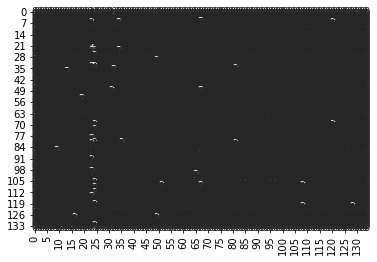

In [13]:
#matplotlib.rcParams['figure.figsize']=(5,5)
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cbar=False,cmap='Blues')
plt.show()

In [14]:
X=result.drop(columns=['category'])
y=result['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state=42)

In [15]:
#Logistic Regression
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)
lr = LogisticRegression(max_iter = 10000,random_state=0)
lr.fit(X_train_std,y_train)
lr.predict_proba(X_test_std)
y_pred=lr.predict(X_test_std)
print(accuracy_score(y_test,y_pred))

0.037209302325581395


In [ ]:
#Linear SVM
decision_tree=result
labelencoder=LabelEncoder()
for column in decision_tree.columns:
  decision_tree[column]=labelencoder.fit_transform(decision_tree[column])
decision_tree.head()
X=decision_tree.drop(columns=['category'])
y=decision_tree['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state=42)
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 score:",f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#Polynomial SVM
svclassifier = SVC(kernel='poly',degree=5)
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 score:",f1_score(y_test, y_pred))
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svclassifier, X_test, y_test,
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#Gaussian SVM
svclassifier1 = SVC(kernel='rbf')
svclassifier1.fit(X_train, y_train)

y_pred = svclassifier1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 score:",f1_score(y_test, y_pred))
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svclassifier1, X_test, y_test,
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
#Sigmoid SVM
svclassifier2 = SVC(kernel='sigmoid')
svclassifier2.fit(X_train, y_train)

y_pred = svclassifier2.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 score:",f1_score(y_test, y_pred))
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svclassifier2, X_test, y_test,
                                 cmap=plt.cm.Reds,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
plt.show()